<a href="https://colab.research.google.com/github/nilkanth02/pytorch-learnings/blob/main/Iris_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [ ]:
# create the model class that inherits the nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)--> Hidden layer1(no. of neurons) -> h2(n)-> output
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df= pd.read_csv(url)

In [ ]:
my_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# changing last column from char to num
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# train test split set x, y
X = my_df.drop('variety', axis =1)
y = my_df['variety']


In [ ]:
#  Coverting these to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# choosing the Adam optimizer also, lr = learning rate (if the error dosen't go down after bunch of iterations(epochs) we lower the learning rate   )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# time to train our model
# epoch -> pass one time
epochs = 200
losses =[]
for i in range(epochs):

  # go forward and get a prediction
  y_pred = model.forward(X_train)
  # Get the predicted results

  # measure the loss
  loss = criterion(y_pred, y_train)  # predicted value vs y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i% 10 ==0:
    print(f'Epoch {i} and loss {loss}')


  # Do some backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  optimizer.step()

Epoch 0 and loss 1.125203251838684
Epoch 10 and loss 0.8427460193634033
Epoch 20 and loss 0.44157999753952026
Epoch 30 and loss 0.24280695617198944
Epoch 40 and loss 0.15970833599567413
Epoch 50 and loss 0.13914915919303894
Epoch 60 and loss 0.08226171880960464
Epoch 70 and loss 0.08175137639045715
Epoch 80 and loss 0.08841466158628464
Epoch 90 and loss 0.05736440792679787
Epoch 100 and loss 0.046676576137542725
Epoch 110 and loss 0.05070602893829346
Epoch 120 and loss 0.051585081964731216
Epoch 130 and loss 0.05018090829253197
Epoch 140 and loss 0.048483122140169144
Epoch 150 and loss 0.047898802906274796
Epoch 160 and loss 0.04832906648516655
Epoch 170 and loss 0.04872262850403786
Epoch 180 and loss 0.04661586508154869
Epoch 190 and loss 0.04485534876585007


Text(0.5, 0, 'Epochs')

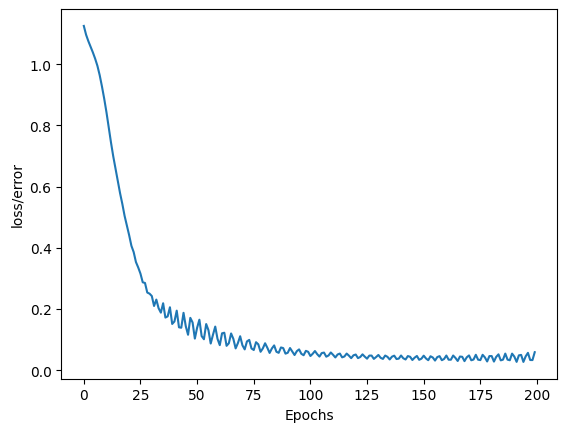

In [ ]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')